In [1]:
import numpy as np
import matplotlib.pyplot as plt
import slugger as slug
import pandas as pd
import matplotlib.ticker as ticker


params = {'text.usetex': False, 'mathtext.fontset': 'stix'}
plt.rcParams.update(params)
%matplotlib inline

In [2]:
rk3 = pd.read_csv('./rk3.csv', index_col=0)
sf3 = pd.read_csv('./sf3.csv', index_col=0)
pif = pd.read_csv('./pif.csv', index_col=0)

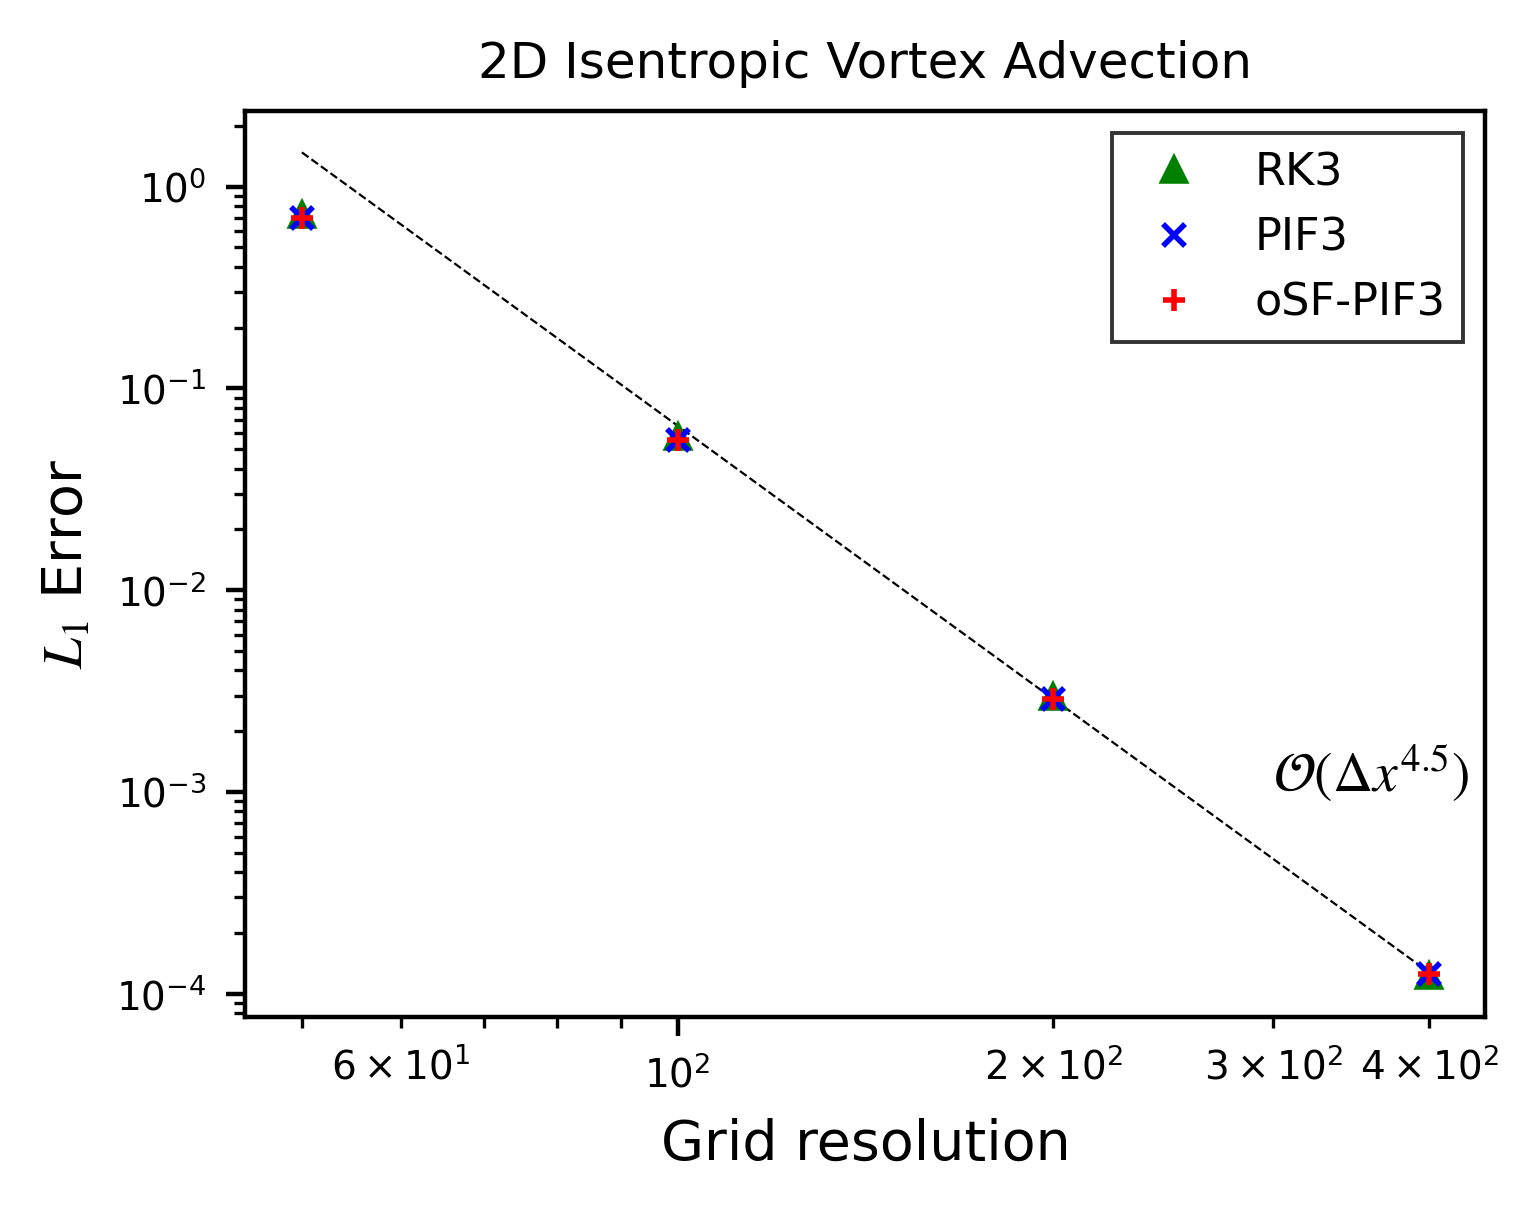

In [3]:
NN = np.array(rk3.index)

a = np.float64(sf3.index[2])
b = sf3["dens"][a]




fig = plt.figure(figsize=(4,3), dpi=400)
ax = fig.add_subplot(1,1,1)

line_order = 4.5

ax.plot(NN, (b*a**line_order)*(NN)**(-line_order), 'k--', linewidth=0.4)
ax.annotate(r'$\mathcal{{O}} (\Delta x^{{{}}})$'.format(line_order), xy=(3.E2,1.E-3))

ax.plot(rk3['dens'], 'g^', markersize=4, linewidth=0.5, label='RK3')
ax.plot(pif['dens'], 'bx', markersize=4, linewidth=0.5, label='PIF3')
ax.plot(sf3['dens'], 'r+', markersize=4, linewidth=0.5, label='oSF-PIF3')


ax.loglog()

# ax.set_xlim(1.E1, 1.5E3)
# ax.set_ylim(1.E-8, 1.E-1)

legend = ax.legend(fontsize=8, numpoints=1, fancybox=False, edgecolor='k')
legend.get_frame().set_linewidth(.7)

ax.tick_params(axis='both', which='both', labelsize=7)
ax.set_title('2D Isentropic Vortex Advection', fontsize=9)

ax.set_xlabel('Grid resolution')
ax.set_ylabel(r'$L_1$' + ' Error')



fig.savefig('./vortex_third.pdf', bbox_inches='tight', pad_inches=0.)

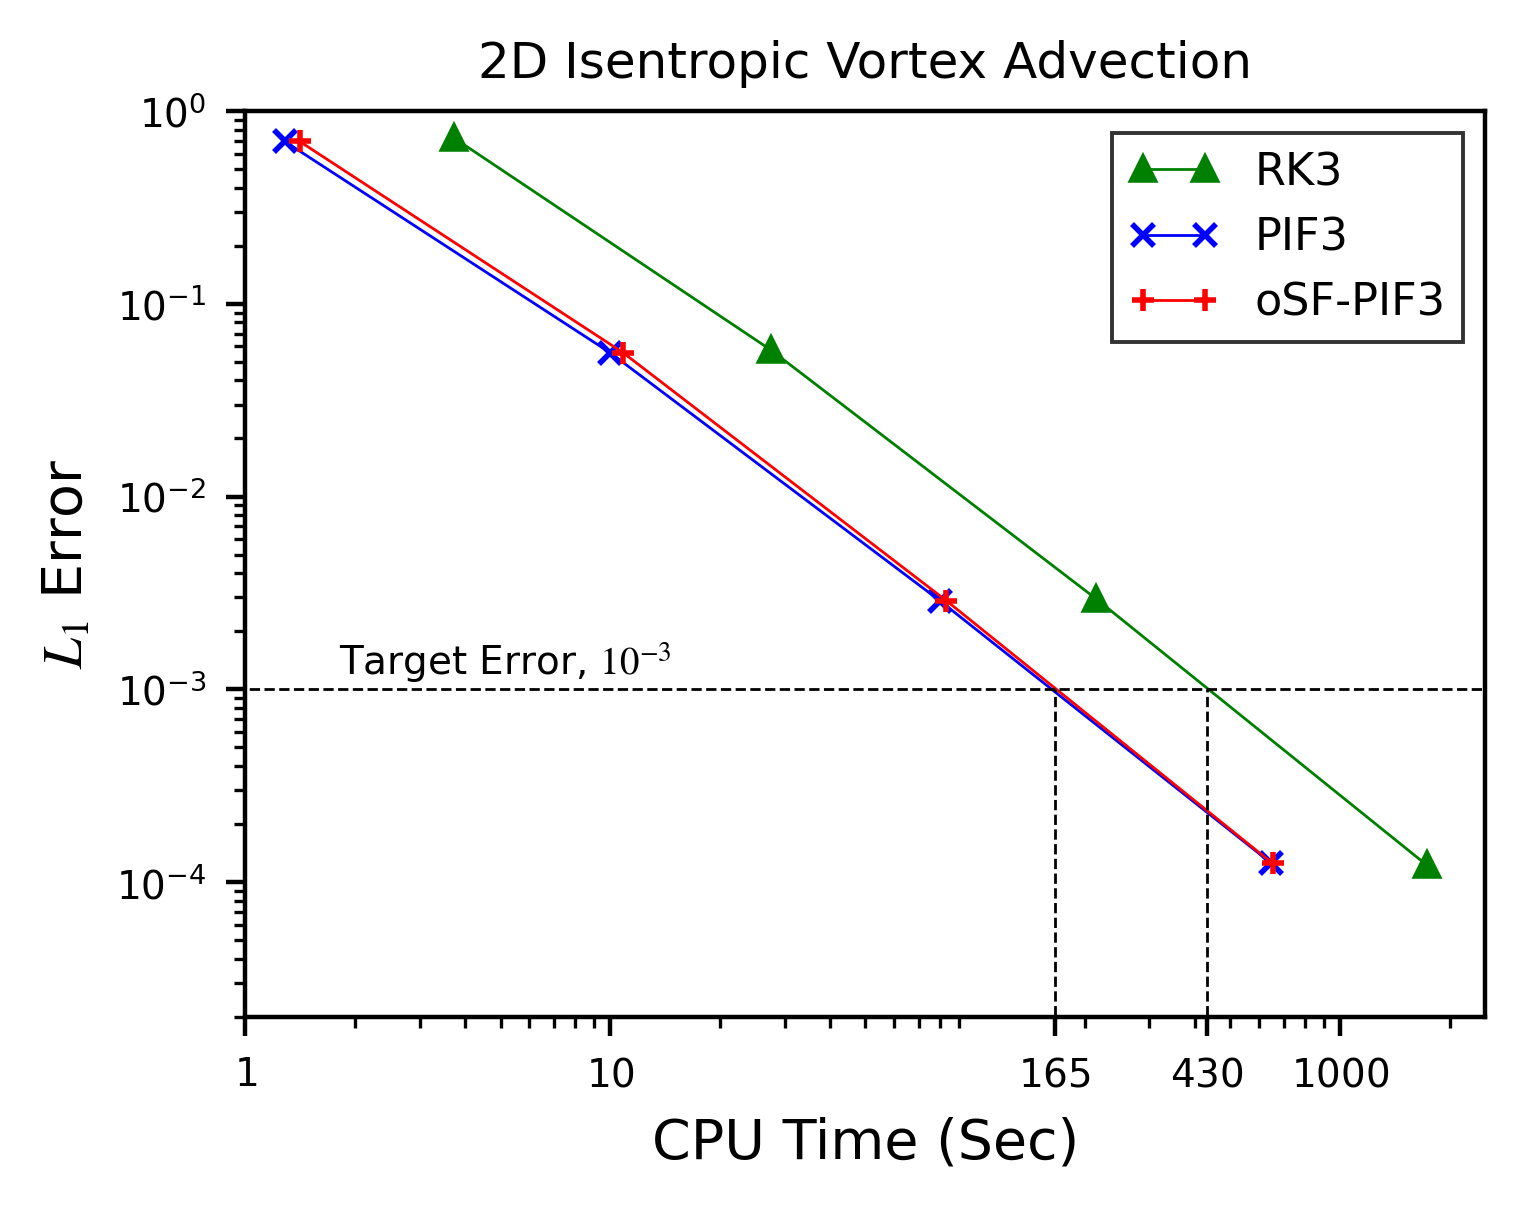

In [4]:
fig = plt.figure(figsize=(4,3), dpi=400)
ax = fig.add_subplot(1,1,1)

ax.plot(rk3['eTime'], rk3['dens'], 'g^-', markersize=4, linewidth=0.5, label='RK3')
ax.plot(pif['eTime'], pif['dens'], 'bx-', markersize=4, linewidth=0.5, label='PIF3')
ax.plot(sf3['eTime'], sf3['dens'], 'r+-', markersize=4, linewidth=0.5, label='oSF-PIF3')


## draw lines
# horizontal
target_error = 1.E-3
ax.plot([0, 3.3E3], [target_error, target_error], 'k--', linewidth=0.5)
# ax.annotate('Target Error, ' + r'${:.1E}$'.format(target_error), xy=(1.2,1.2E-3))
ax.annotate('Target Error, ' + r'$10^{-3}$', xy=(1.8,1.2E-3), fontsize=7)

# vertical
sf3_tTime = 1.65E2
rk3_tTime = 4.3E2
ax.plot([sf3_tTime, sf3_tTime], [1.2E-5, target_error], 'k--', linewidth=0.5)
ax.plot([rk3_tTime, rk3_tTime], [1.2E-5, target_error], 'k--', linewidth=0.5)


ax.loglog()

ax.set_xlim(1.E0, 2.5E3)
ax.set_ylim(2.E-5, 1.E-0)

legend = ax.legend(fontsize=8, numpoints=2, fancybox=False, edgecolor='k')
legend.get_frame().set_linewidth(.7)

ax.tick_params(axis='both', which='both', labelsize=7)
ax.set_title('2D Isentropic Vortex Advection', fontsize=9)

# modify xticks
ax.set_xticks([1., 10., sf3_tTime, rk3_tTime, 1000.])
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))


ax.set_xlabel('CPU Time (Sec)')
ax.set_ylabel(r'$L_1$' + ' Error')



fig.savefig('./vortex_time_third.pdf', bbox_inches='tight', pad_inches=0.01)